In [1]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import matplotlib.ticker as tkr
import pandas as pd
import re
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
## Input/Output
DATA_FOLDER="data/OPENDATANC/"
FILE = "OPENDATANC_fruits_et_legumes_regroupement_1.csv"
FILE2 = "OPENDATANC_fruits_et_legumes_regroupement_2.csv"

In [3]:
df_raw_r1 = pd.read_csv(DATA_FOLDER + FILE)
nb_col_r1 = len(df_raw_r1.columns.to_list())
nb_ligne_r1 = len(df_raw_r1.index)

df_raw_r2 = pd.read_csv(DATA_FOLDER + FILE2)
nb_col_r2 = len(df_raw_r2.columns.to_list())
nb_ligne_r2 = len(df_raw_r2.index)

print(f'{FILE} : {nb_col_r1} colonnes, {nb_ligne_r1} lignes')
print(f'{FILE2} : {nb_col_r2} colonnes, {nb_ligne_r2} lignes')

OPENDATANC_fruits_et_legumes_regroupement_1.csv : 13 colonnes, 5162 lignes
OPENDATANC_fruits_et_legumes_regroupement_2.csv : 13 colonnes, 278 lignes


In [4]:
COLUMN_NAMES_r1 = list(df_raw_r1.columns)
COLUMN_NAMES_r2 = list(df_raw_r2.columns)

# for column_name in COLUMN_NAMES_r1:
#     print(column_name)
#     print(df_raw_r1[column_name].unique())
    
# for column_name in COLUMN_NAMES_r2:
#     print(column_name)
#     print(df_raw_r2[column_name].unique())

In [5]:
## Renommage des colonnes
df_net_r1 = df_raw_r1.rename(columns={'annee': 'ANNEE', 
                                      'mois': 'MOIS',
                                      'regroupement1':'DESIGNATIONS',
                                      'regroupement2':'TYPE',
                                      'poids_enquete_kg':'PRODUCTEURS_KG',
                                      'poids_mg_kg':'MG_KG',
                                      'valeur_tot_mg_fr':'MG_XPF',
                                      'valeur_moy':'MOYENNE_MG_XPF',
                                      'besoin_marche_t':'BESOIN_T',
                                      'quotas_date_debut':'QUOTAS_DATE_DEBUT',
                                      'quotas_date_fin':'QUOTAS_DATE_FIN',
                                      'quotas_contingent_t':'QUOTAS_CONTINGENT_T',
                                      'quotas_realise_t':'QUOTAS_REALISE_T'
                                    })

df_net_r2 = df_raw_r2.rename(columns={'annee': 'ANNEE', 
                                      'mois': 'MOIS',
                                      'regroupement2':'TYPE',
                                      'poids_enquete_kg':'PRODUCTEURS_KG',
                                      'poids_mg_kg':'MG_KG',
                                      'valeur_tot_mg_fr':'MG_XPF',
                                      'valeur_moy':'MOYENNE_MG_XPF',
                                      'indice_isee':'INDICE_ISEE',
                                      'indice_mg':'INDICE_MG',
                                      'quotas_date_debut':'QUOTAS_DATE_DEBUT',
                                      'quotas_date_fin':'QUOTAS_DATE_FIN',
                                      'quotas_contingent_t':'QUOTAS_CONTINGENT_T',
                                      'quotas_realise_t':'QUOTAS_REALISE_T'
                                     })


## Conversion des dates en format date
df_net_r1['QUOTAS_DATE_DEBUT'] = pd.to_datetime(df_net_r1['QUOTAS_DATE_DEBUT'])
df_net_r1['QUOTAS_DATE_FIN'] = pd.to_datetime(df_net_r1['QUOTAS_DATE_FIN'])
df_net_r2['QUOTAS_DATE_DEBUT'] = pd.to_datetime(df_net_r2['QUOTAS_DATE_DEBUT'])
df_net_r2['QUOTAS_DATE_FIN'] = pd.to_datetime(df_net_r1['QUOTAS_DATE_FIN'])

# Ajout colonne en Tonnes
df_net_r1['PRODUCTEURS_T'] = df_net_r1['PRODUCTEURS_KG']/1000
df_net_r1['MG_T'] = df_net_r1['MG_KG']/1000
df_net_r2['PRODUCTEURS_T'] = df_net_r2['PRODUCTEURS_KG']/1000
df_net_r2['MG_T'] = df_net_r2['MG_KG']/1000

# print(df_net_r1)
# print(df_net_r2)

In [6]:
# Analyse n°1 - R2
df_net_r2_fruit = df_net_r2[df_net_r2["TYPE"]=="TOTAL FRUITS (HORS VANILLE)"]
df_net_r2_legume = df_net_r2[df_net_r2["TYPE"]=="TOTAL LEGUMES"]

df_r2_gb_fruit = df_net_r2_fruit.groupby(['ANNEE']).agg({'MOIS':'count','PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
df_r2_gb_fruit['MOYENNE_MG_XPF']=df_r2_gb_fruit['MG_XPF']/df_r2_gb_fruit['MG_KG']

df_r2_gb_legume = df_net_r2_legume.groupby(['ANNEE']).agg({'MOIS':'count','PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
df_r2_gb_legume['MOYENNE_MG_XPF']=df_r2_gb_legume['MG_XPF']/df_r2_gb_legume['MG_KG']

df_r2_gb_fruit['PRODUCTEURS_T_N'] = df_r2_gb_fruit['PRODUCTEURS_T']*12/df_r2_gb_fruit['MOIS']
df_r2_gb_fruit['MG_T_N'] = df_r2_gb_fruit['MG_T']*12/df_r2_gb_fruit['MOIS']
df_r2_gb_legume['PRODUCTEURS_T_N'] = df_r2_gb_legume['PRODUCTEURS_T']*12/df_r2_gb_legume['MOIS']
df_r2_gb_legume['MG_T_N'] = df_r2_gb_legume['MG_T']*12/df_r2_gb_legume['MOIS']

# print(df_r2_gb_fruit)
# print(df_r2_gb_legume)


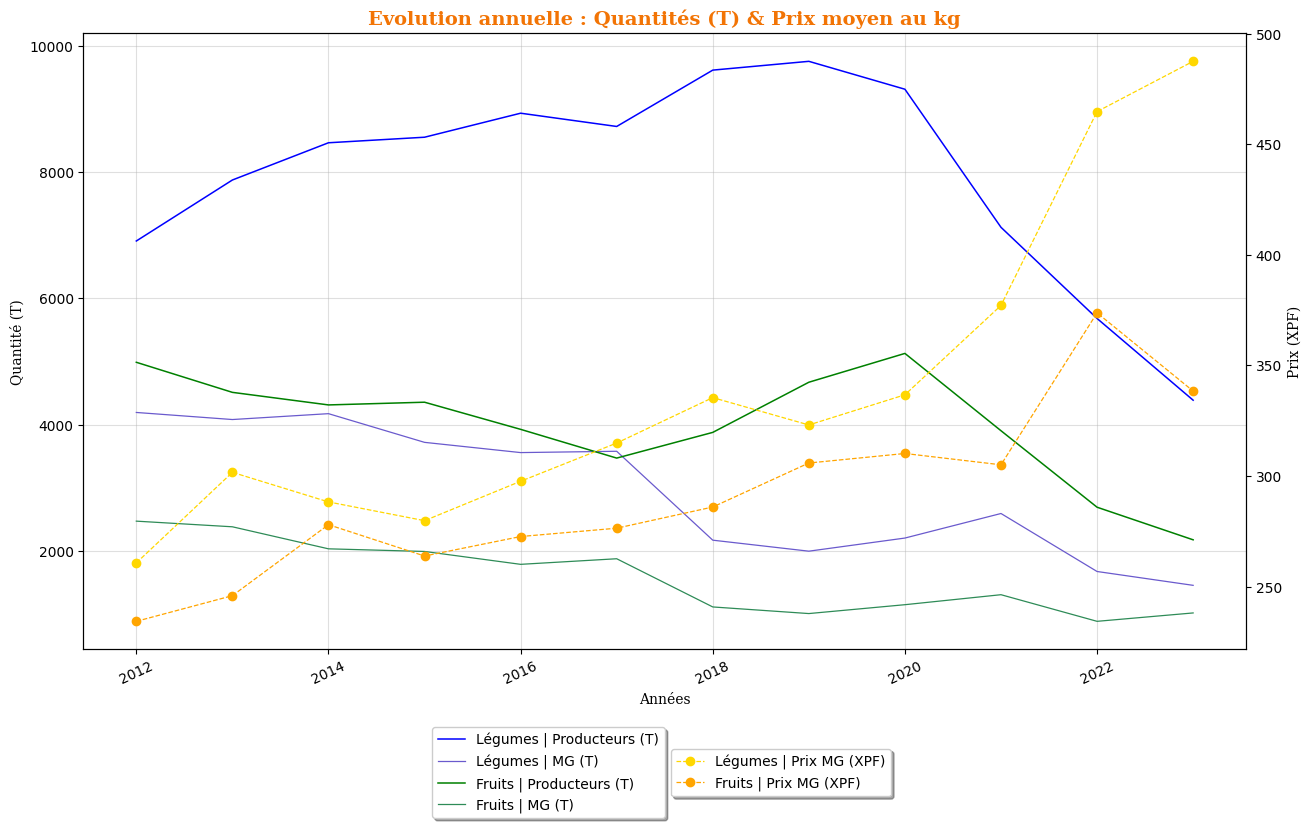

In [7]:
## GRAPHIQUE n°1
TITLE = "Evolution annuelle : Quantités (T) & Prix moyen au kg"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 14})
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Quantité (T)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.plot(df_r2_gb_legume.index.values,df_r2_gb_legume.PRODUCTEURS_T_N,'blue',linewidth=1.1,label="Légumes | Producteurs (T)")
axes.plot(df_r2_gb_legume.index.values,df_r2_gb_legume.MG_T_N,'slateblue',linewidth=.9,label="Légumes | MG (T)")
axes.plot(df_r2_gb_fruit.index.values,df_r2_gb_fruit.PRODUCTEURS_T_N,'green',linewidth=1.1,label="Fruits | Producteurs (T)")
axes.plot(df_r2_gb_fruit.index.values,df_r2_gb_fruit.MG_T_N,'seagreen',linewidth=.9,label="Fruits | MG (T)")
axes.legend(loc="center",bbox_to_anchor=(0,0,0.8,-0.4), ncol=1, fancybox=True, shadow=True)
# axes.set_ylim(34.2,34.6)

# Axe 2
axe2 = axes.twinx()
axe2.set_ylabel("Prix (XPF)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axe2.plot(df_r2_gb_legume.index.values,df_r2_gb_legume.MOYENNE_MG_XPF,'gold',linestyle='--', marker='o',linewidth=.9,label="Légumes | Prix MG (XPF)")
axe2.plot(df_r2_gb_fruit.index.values,df_r2_gb_fruit.MOYENNE_MG_XPF,'orange',linestyle='--', marker='o',linewidth=.9,label="Fruits | Prix MG (XPF)")
axe2.legend(loc="center",bbox_to_anchor=(0,0,1.2,-0.4), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(34.2,34.6)

# Option grille
axes.grid(True,alpha=0.4)

In [8]:
# Analyse n°2 - R2
df_r2_gb_fruit_m = df_net_r2_fruit.groupby(['MOIS']).agg({'PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
df_r2_gb_fruit_m['MOYENNE_MG_XPF']=df_r2_gb_fruit_m['MG_XPF']/df_r2_gb_fruit_m['MG_KG']

df_r2_gb_legume_m = df_net_r2_legume.groupby(['MOIS']).agg({'PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
df_r2_gb_legume_m['MOYENNE_MG_XPF']=df_r2_gb_legume_m['MG_XPF']/df_r2_gb_legume_m['MG_KG']

# print(df_r2_gb_fruit_m)
# print(df_r2_gb_legume_m)


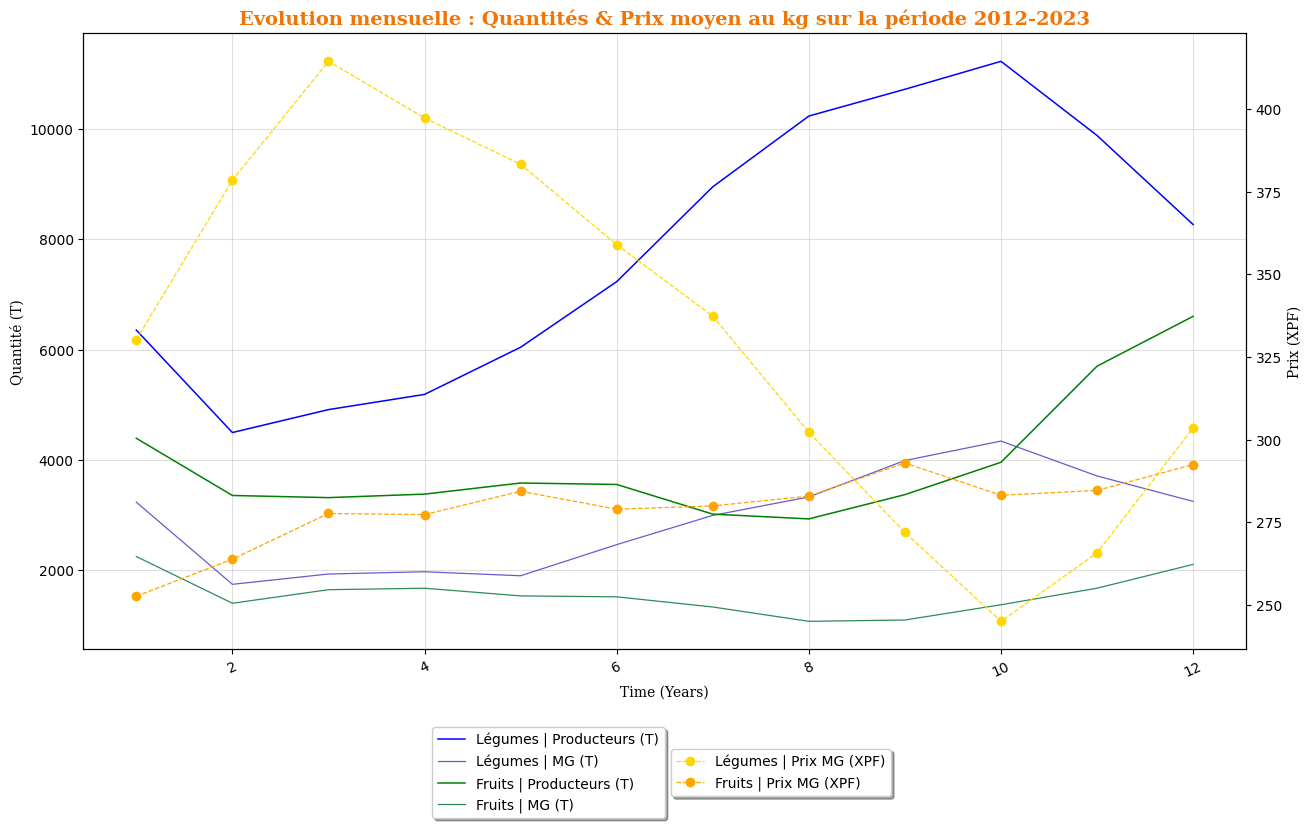

In [9]:
## GRAPHIQUE n°2
TITLE = "Evolution mensuelle : Quantités & Prix moyen au kg sur la période 2012-2023"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin

# Format date xaxis
plt.xticks(rotation=25)

# Axe 1
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 14})
axes.set_xlabel("Time (Years)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Quantité (T)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.plot(df_r2_gb_legume_m.index.values,df_r2_gb_legume_m.PRODUCTEURS_T,'blue',linewidth=1.1,label="Légumes | Producteurs (T)")
axes.plot(df_r2_gb_legume_m.index.values,df_r2_gb_legume_m.MG_T,'slateblue',linewidth=.9,label="Légumes | MG (T)")
axes.plot(df_r2_gb_fruit_m.index.values,df_r2_gb_fruit_m.PRODUCTEURS_T,'green',linewidth=1.1,label="Fruits | Producteurs (T)")
axes.plot(df_r2_gb_fruit_m.index.values,df_r2_gb_fruit_m.MG_T,'seagreen',linewidth=.9,label="Fruits | MG (T)")
axes.legend(loc="center",bbox_to_anchor=(0,0,0.8,-0.4), ncol=1, fancybox=True, shadow=True)
# axes.set_ylim(34.2,34.6)

# Axe 2
axe2 = axes.twinx()
axe2.set_ylabel("Prix (XPF)", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axe2.plot(df_r2_gb_legume_m.index.values,df_r2_gb_legume_m.MOYENNE_MG_XPF,'gold',linestyle='--', marker='o',linewidth=.9,label="Légumes | Prix MG (XPF)")
axe2.plot(df_r2_gb_fruit_m.index.values,df_r2_gb_fruit_m.MOYENNE_MG_XPF,'orange',linestyle='--', marker='o',linewidth=.9,label="Fruits | Prix MG (XPF)")
axe2.legend(loc="center",bbox_to_anchor=(0,0,1.2,-0.4), ncol=1, fancybox=True, shadow=True)
# axe2.set_ylim(34.2,34.6)

# Option grille
axes.grid(True,alpha=0.4)

In [10]:
# Analyse n°3 - R1
df_net_r1['PROD_MG_T']=df_net_r1['PRODUCTEURS_T']+df_net_r1['MG_T']

df_net_r1_fruit = df_net_r1[df_net_r1["TYPE"]=="TOTAL FRUITS (HORS VANILLE)"]
df_net_r1_legume = df_net_r1[df_net_r1["TYPE"]=="TOTAL LEGUMES"]

In [11]:
df_r1_gb_legume_xpf_y = df_net_r1_legume.groupby(['DESIGNATIONS','ANNEE']).agg({'MOIS':'count','PROD_MG_T':'sum'})
df_r1_gb_legume_xpf_y['PROD_MG_T_N'] = df_r1_gb_legume_xpf_y['PROD_MG_T']*12/df_r1_gb_legume_xpf_y['MOIS']
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='PROD_MG_T_N')
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot[df_r1_gb_legume_xpf_y_pivot.sum().sort_values(ascending=False).index]

df_r1_gb_legume_xpf_y_pivot_tv_sum = df_r1_gb_legume_xpf_y_pivot

df_r1_gb_legume_xpf_y_pivot_tv_sum.loc[:,'Total'] = df_r1_gb_legume_xpf_y_pivot_tv_sum.sum(numeric_only=True, axis=1)
df_r1_gb_legume_xpf_y_pivot_tv_sum = df_r1_gb_legume_xpf_y_pivot_tv_sum.iloc[:, :].apply(lambda x: (x-x.iloc[0])/x.iloc[0]*100)

df_r1_gb_legume_xpf_y_pivot_tv = df_r1_gb_legume_xpf_y_pivot_tv_sum.drop('Total', axis=1)
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot.drop('Total', axis=1)

GLOBAL_LEGUME_ORDER = df_r1_gb_legume_xpf_y_pivot.columns.to_list()

In [12]:
df_r1_gb_fruit_xpf_y = df_net_r1_fruit.groupby(['DESIGNATIONS','ANNEE']).agg({'MOIS':'count','PROD_MG_T':'sum'})
df_r1_gb_fruit_xpf_y['PROD_MG_T_N'] = df_r1_gb_fruit_xpf_y['PROD_MG_T']*12/df_r1_gb_fruit_xpf_y['MOIS']
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='PROD_MG_T_N')
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot[df_r1_gb_fruit_xpf_y_pivot.sum().sort_values(ascending=False).index]

df_r1_gb_fruit_xpf_y_pivot_tv_sum = df_r1_gb_fruit_xpf_y_pivot

df_r1_gb_fruit_xpf_y_pivot_tv_sum.loc[:,'Total'] = df_r1_gb_fruit_xpf_y_pivot_tv_sum.sum(numeric_only=True, axis=1)
df_r1_gb_fruit_xpf_y_pivot_tv_sum = df_r1_gb_fruit_xpf_y_pivot_tv_sum.iloc[:, :].apply(lambda x: (x-x.iloc[0])/x.iloc[0]*100)

df_r1_gb_fruit_xpf_y_pivot_tv = df_r1_gb_fruit_xpf_y_pivot_tv_sum.drop('Total', axis=1)
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot.drop('Total', axis=1)

GLOBAL_FRUIT_ORDER = df_r1_gb_fruit_xpf_y_pivot.columns.to_list()

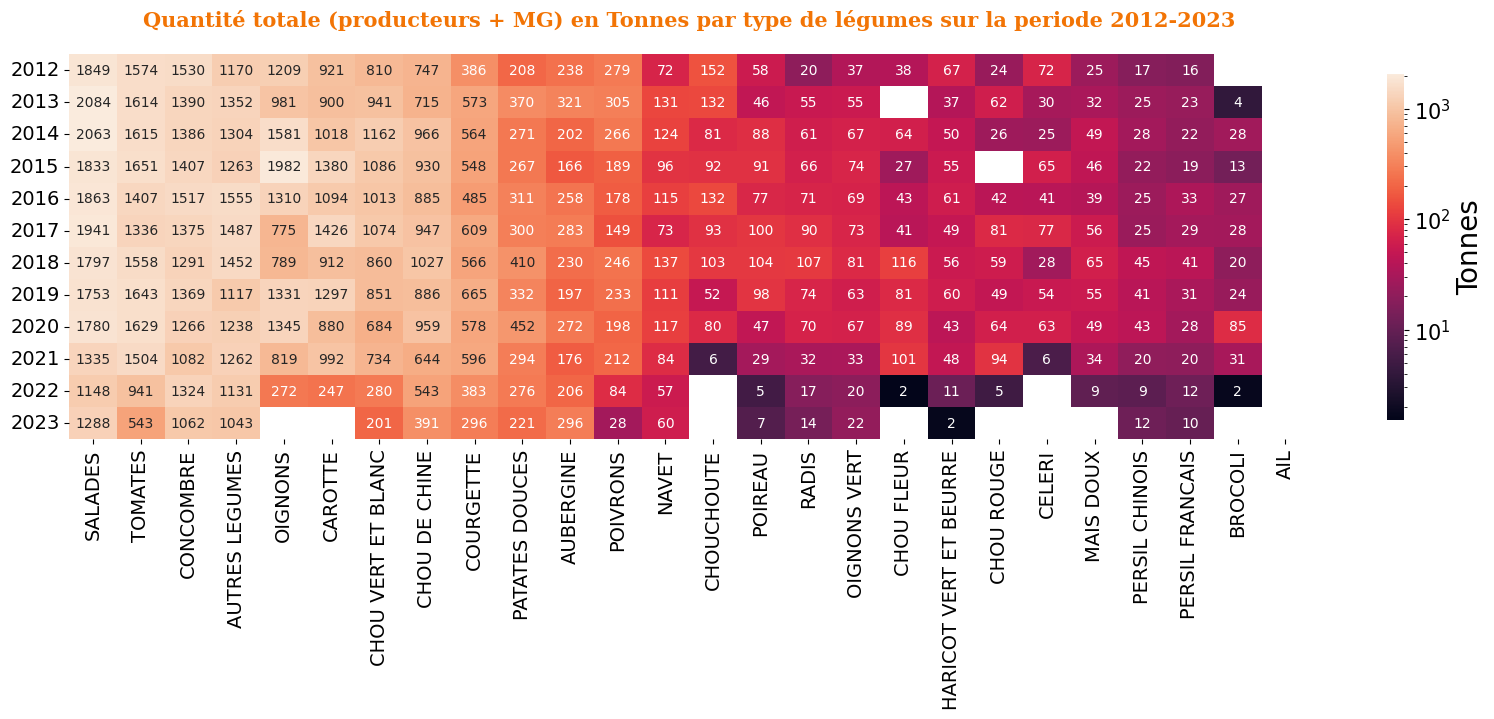

In [13]:
## GRAPHIQUE 3.1
TITLE = "Quantité totale (producteurs + MG) en Tonnes par type de légumes sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 15},pad=20)
ax = sns.heatmap(df_r1_gb_legume_xpf_y_pivot, annot=True, square=False, norm=LogNorm(), cmap="rocket", cbar_kws={'label': 'Tonnes', 'location' : 'right',"shrink": 0.9}, fmt='.0f')
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('Tonnes', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
xa = ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ya = ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)


C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_5192\4048874786.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


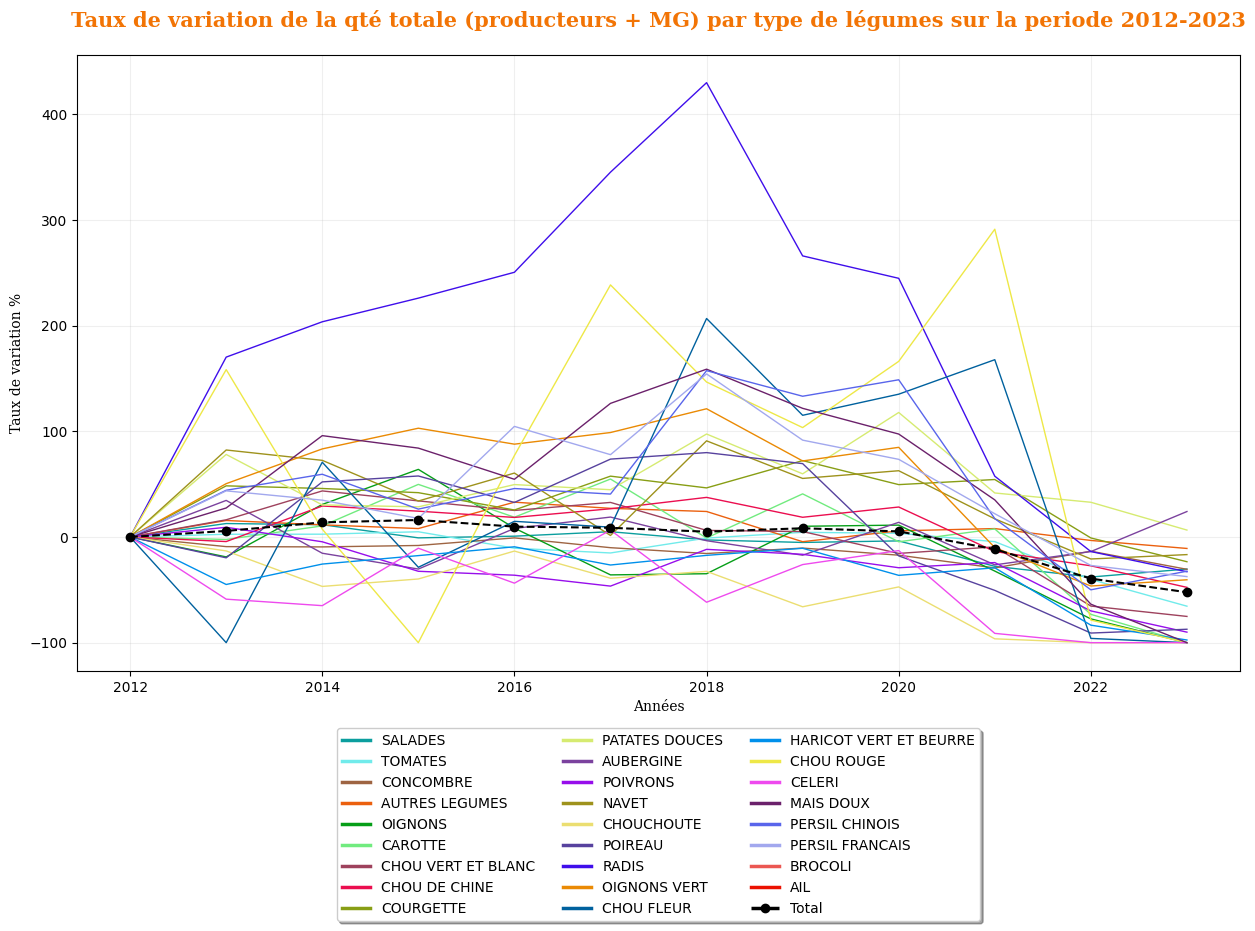

In [14]:
## GRAPHIQUE 3.2
TITLE = "Taux de variation de la qté totale (producteurs + MG) par type de légumes sur la periode 2012-2023" # Titre de la figure

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin
fig.subplots_adjust(hspace=0.02)

# Zone 2
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 15},pad=20)
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Taux de variation %", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})

color = ['#0B9E9E', '#71EBEB' ,'#9E6442' ,'#EB600E',\
         '#069E18','#71EB7F','#9E425D','#EB0E4F',\
         '#889E15','#D6EB71','#7B429E','#970EEB',\
         '#9E921C','#EBDE71','#57429E','#3F0EEB',\
         '#EA8A04','#00619E','#0090EB','#EEE847',\
         '#EE4AEE','#6B216B','#5965EB','#A2A8EE',\
         '#EB5752','#EB1101','#5FEA00','#47EEAE']
i = 0
for alim in df_r1_gb_legume_xpf_y_pivot_tv.columns.to_list():
    axes.plot(df_r1_gb_legume_xpf_y_pivot_tv.index.values,df_r1_gb_legume_xpf_y_pivot_tv[alim],color[i],linewidth=1,label=alim)
    i+=1
axes.plot(df_r1_gb_legume_xpf_y_pivot_tv_sum.index.values,df_r1_gb_legume_xpf_y_pivot_tv_sum['Total'],'black',linestyle='--', marker='o',linewidth=1.5,label='Total')
axes.grid(True,alpha=0.2)


# Légende
leg = axes.legend(loc="center",bbox_to_anchor=(0,0,1,-0.5), ncol=3, fancybox=True, shadow=True)

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.5)

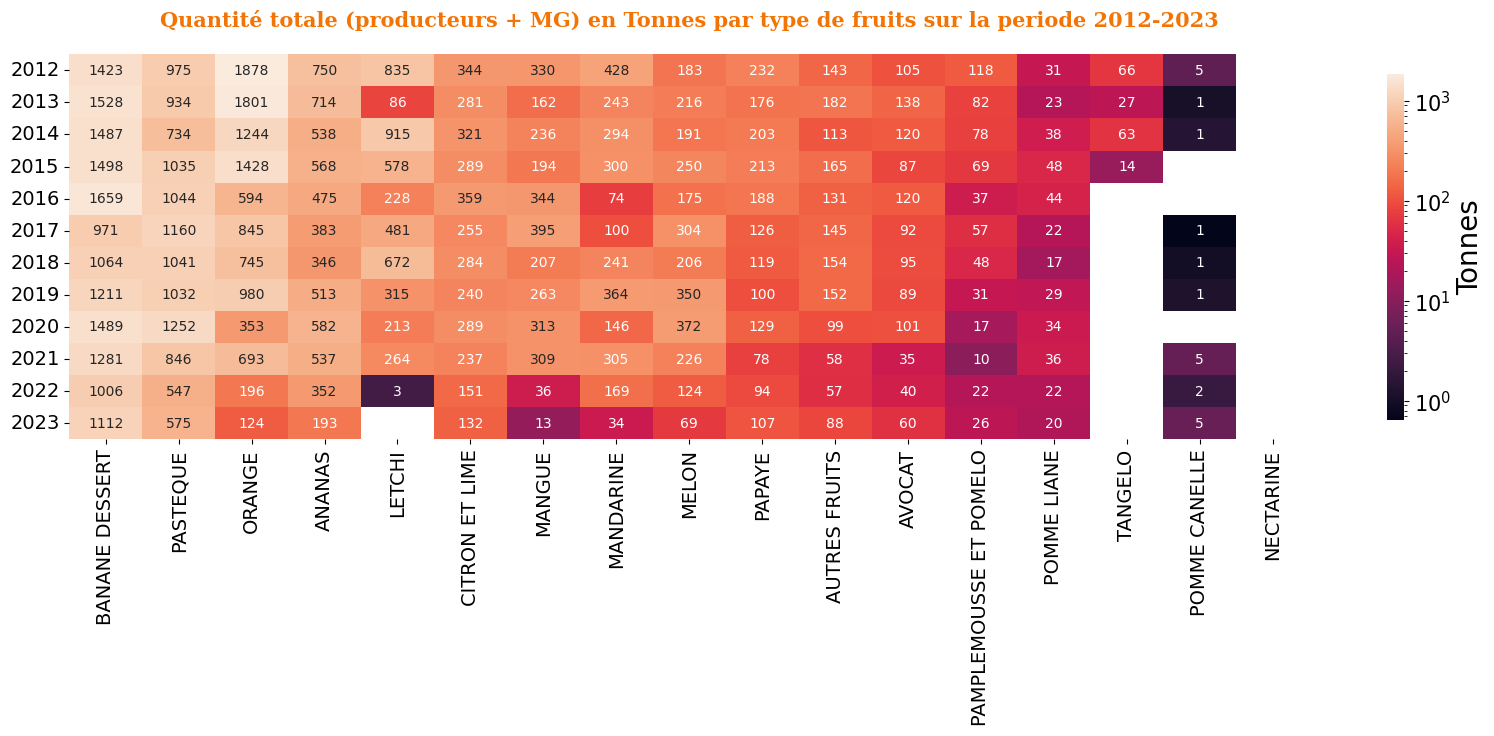

In [15]:
## GRAPHIQUE 3.3
TITLE = "Quantité totale (producteurs + MG) en Tonnes par type de fruits sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 15},pad=20)
ax = sns.heatmap(df_r1_gb_fruit_xpf_y_pivot, annot=True, square=False, norm=LogNorm(), cmap="rocket", cbar_kws={'label': 'Tonnes', 'location' : 'right',"shrink": 0.9}, fmt='.0f')
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('Tonnes', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
xa = ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ya = ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

C:\Users\Sloutmyv\AppData\Local\Temp\ipykernel_5192\1685906231.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


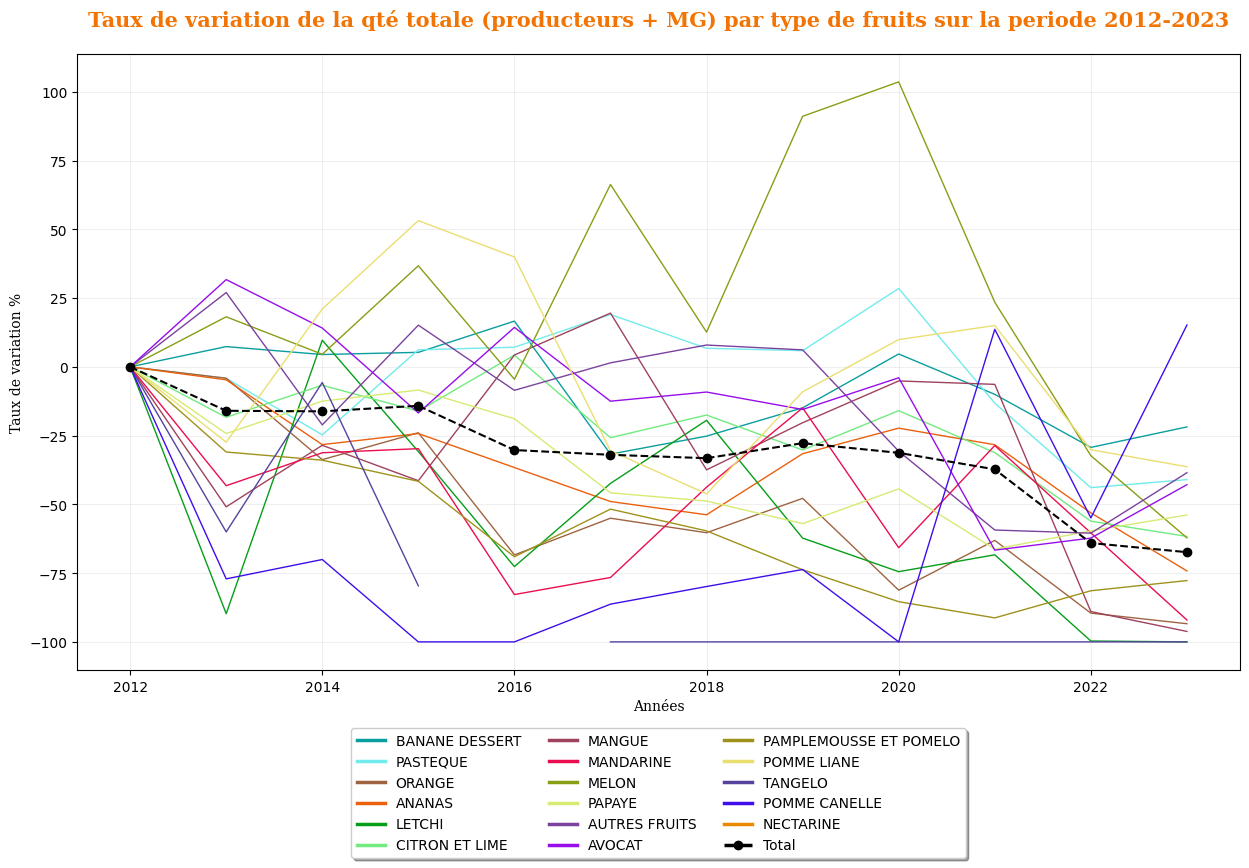

In [16]:
## GRAPHIQUE 3.4
TITLE = "Taux de variation de la qté totale (producteurs + MG) par type de fruits sur la periode 2012-2023" # Titre de la figure

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin
fig.subplots_adjust(hspace=0.02)

# Zone 2
axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 15},pad=20)
axes.set_xlabel("Années", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})
axes.set_ylabel("Taux de variation %", fontdict={'family': 'serif','color' : 'black','weight': 'light','size': 10})

color = ['#0B9E9E', '#71EBEB' ,'#9E6442' ,'#EB600E',\
         '#069E18','#71EB7F','#9E425D','#EB0E4F',\
         '#889E15','#D6EB71','#7B429E','#970EEB',\
         '#9E921C','#EBDE71','#57429E','#3F0EEB',\
         '#EA8A04','#00619E','#0090EB','#EEE847',\
         '#EE4AEE','#6B216B','#5965EB','#A2A8EE',\
         '#EB5752','#EB1101','#5FEA00','#47EEAE']
i = 0
for alim in df_r1_gb_fruit_xpf_y_pivot_tv.columns.to_list():
    axes.plot(df_r1_gb_fruit_xpf_y_pivot_tv.index.values,df_r1_gb_fruit_xpf_y_pivot_tv[alim],color[i],linewidth=1,label=alim)
    i+=1
axes.plot(df_r1_gb_fruit_xpf_y_pivot_tv_sum.index.values,df_r1_gb_fruit_xpf_y_pivot_tv_sum['Total'],'black',linestyle='--', marker='o',linewidth=1.5,label='Total')
axes.grid(True,alpha=0.2)


# Légende
leg = axes.legend(loc="center",bbox_to_anchor=(0,0,1,-0.4), ncol=3, fancybox=True, shadow=True)

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(2.5)

In [17]:
# Analyse n°4
df_net_r1['PROD_MG_T']=df_net_r1['PRODUCTEURS_T']+df_net_r1['MG_T']
df_net_r1_fruit = df_net_r1[df_net_r1["TYPE"]=="TOTAL FRUITS (HORS VANILLE)"]
df_net_r1_legume = df_net_r1[df_net_r1["TYPE"]=="TOTAL LEGUMES"]

df_r1_gb_fruit_xpf_y = df_net_r1_fruit.groupby(['DESIGNATIONS','ANNEE']).agg({'MG_KG':'sum','MG_XPF':'sum'})
df_r1_gb_fruit_xpf_y['PRIX_KG']=df_r1_gb_fruit_xpf_y['MG_XPF']/df_r1_gb_fruit_xpf_y['MG_KG']

df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='PRIX_KG')
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot[df_r1_gb_fruit_xpf_y_pivot.sum().sort_values(ascending=False).index]
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot.iloc[:, :].apply(lambda x: (x-x.iloc[0])*100 / x.iloc[0])

df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot[GLOBAL_FRUIT_ORDER]


df_r1_gb_legume_xpf_y = df_net_r1_legume.groupby(['DESIGNATIONS','ANNEE']).agg({'MG_KG':'sum','MG_XPF':'sum'})
df_r1_gb_legume_xpf_y['PRIX_KG']=df_r1_gb_legume_xpf_y['MG_XPF']/df_r1_gb_legume_xpf_y['MG_KG']

df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='PRIX_KG')
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot[df_r1_gb_legume_xpf_y_pivot.sum().sort_values(ascending=False).index]
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot.iloc[:, :].apply(lambda x: (x-x.iloc[0])*100 / x.iloc[0])

GLOBAL_LEGUME_ORDER.remove('AIL')

df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot[GLOBAL_LEGUME_ORDER]


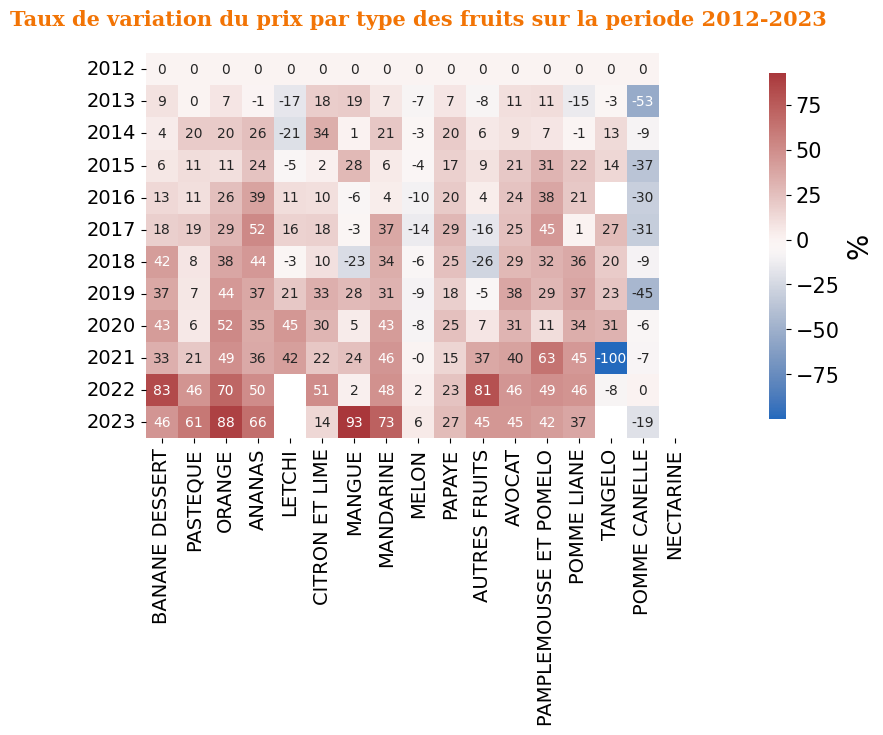

In [18]:
## GRAPHIQUE 4.1
TITLE = "Taux de variation du prix par type des fruits sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 15},pad=20)
ax = sns.heatmap(df_r1_gb_fruit_xpf_y_pivot, annot=True, square=True, cmap="vlag", cbar_kws={'label': '%', 'location' : 'right',"shrink": 0.9}, fmt='.0f', center=0)
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('%', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
xa = ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ya = ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

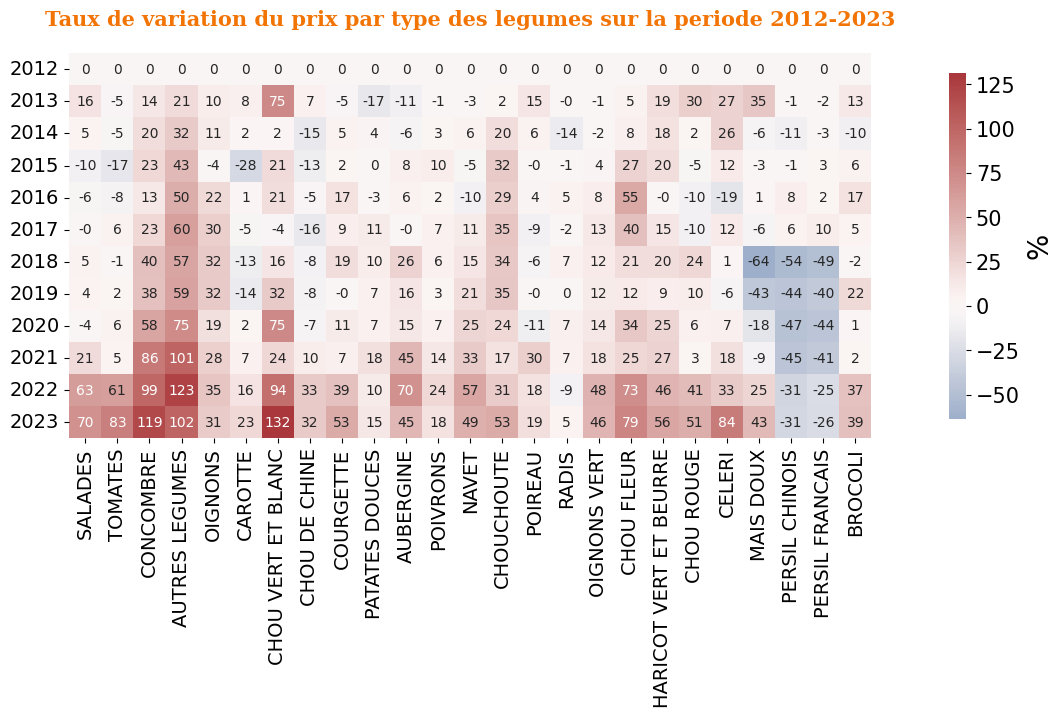

In [19]:
## GRAPHIQUE 4.2
TITLE = "Taux de variation du prix par type des legumes sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 15},pad=20)
ax = sns.heatmap(df_r1_gb_legume_xpf_y_pivot, annot=True, square=True, cmap="vlag", cbar_kws={'label': '%', 'location' : 'right',"shrink": 0.9}, fmt='.0f', center=0)
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('%', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
xa = ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ya = ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

In [20]:
# Analyse n° 5
df_net_r1_fruit = df_net_r1[df_net_r1["TYPE"]=="TOTAL FRUITS (HORS VANILLE)"]
df_net_r1_legume = df_net_r1[df_net_r1["TYPE"]=="TOTAL LEGUMES"]

df_r1_gb_fruit_xpf_y = df_net_r1_fruit.groupby(['DESIGNATIONS','ANNEE']).agg({'QUOTAS_REALISE_T':'sum'})
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='QUOTAS_REALISE_T')
df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot[df_r1_gb_fruit_xpf_y_pivot.sum().sort_values(ascending=False).index]

df_r1_gb_fruit_xpf_y_pivot = df_r1_gb_fruit_xpf_y_pivot[GLOBAL_FRUIT_ORDER]

df_r1_gb_legume_xpf_y = df_net_r1_legume.groupby(['DESIGNATIONS','ANNEE']).agg({'QUOTAS_REALISE_T':'sum'})
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y.pivot_table(columns='DESIGNATIONS', index='ANNEE', values='QUOTAS_REALISE_T')
df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot[df_r1_gb_legume_xpf_y_pivot.sum().sort_values(ascending=False).index]

df_r1_gb_legume_xpf_y_pivot = df_r1_gb_legume_xpf_y_pivot[GLOBAL_LEGUME_ORDER]

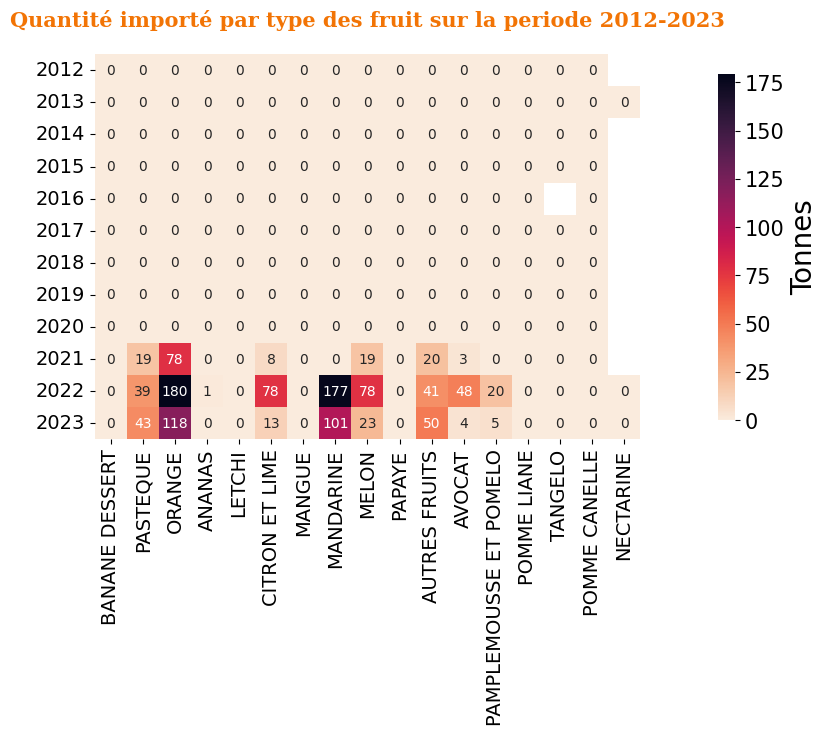

In [21]:
## GRAPHIQUE 5.1
TITLE = "Quantité importé par type des fruit sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 15},pad=20)
ax = sns.heatmap(df_r1_gb_fruit_xpf_y_pivot, annot=True, square=True, cmap="rocket_r", cbar_kws={'label': 'Tonnes', 'location' : 'right',"shrink": 0.9}, fmt='.0f')
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('Tonnes', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
xa = ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ya = ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

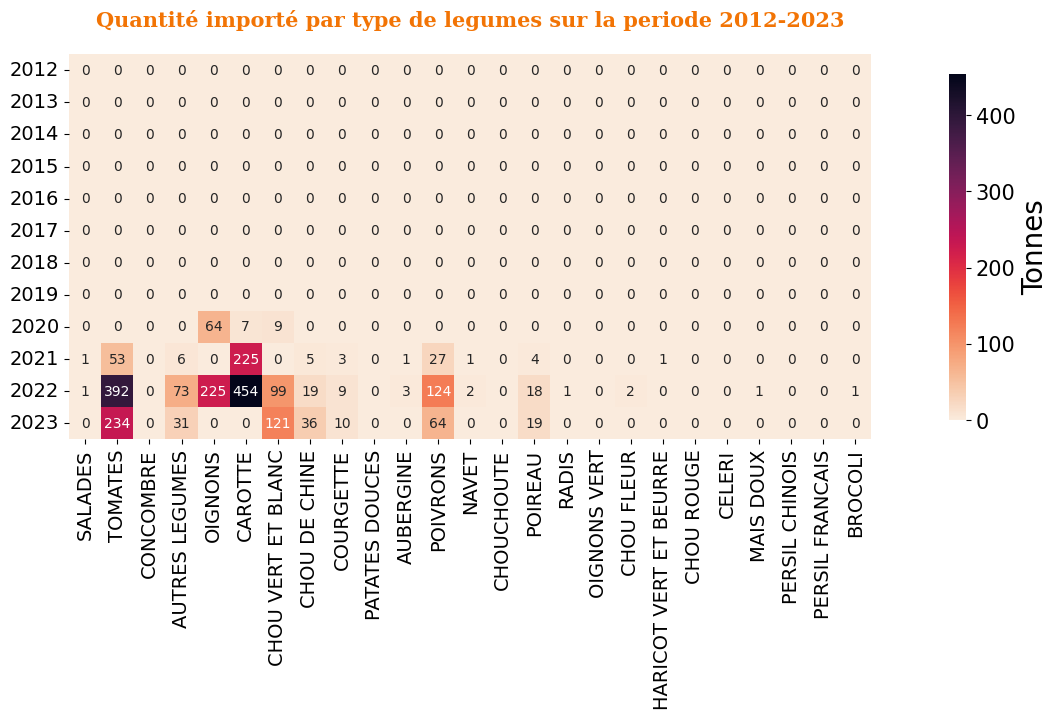

In [22]:
## GRAPHIQUE 5.2
TITLE = "Quantité importé par type de legumes sur la periode 2012-2023"
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5)) # Nombre et disposition des zones de dessin

ax.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 15},pad=20)
ax = sns.heatmap(df_r1_gb_legume_xpf_y_pivot, annot=True, square=True, cmap="rocket_r", cbar_kws={'label': 'Tonnes', 'location' : 'right',"shrink": 0.9}, fmt='.0f')
ax.set(xlabel="", ylabel="")
ax.figure.axes[-1].set_ylabel('Tonnes', size=20)
ax.figure.axes[-1].tick_params(labelsize=15)
xa = ax.set_xticklabels(ax.get_xticklabels(), fontsize=14, rotation=90)
ya = ax.set_yticklabels(ax.get_yticklabels(), fontsize=14, rotation=0)

In [23]:
# Analyse n°6
print(df_net_r2.QUOTAS_REALISE_T.max())

# df_r2_gb_fruit_m = df_net_r2_fruit.groupby(['MOIS']).agg({'PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
# df_r2_gb_fruit_m['MOYENNE_MG_XPF']=df_r2_gb_fruit_m['MG_XPF']/df_r2_gb_fruit_m['MG_KG']

# df_r2_gb_legume_m = df_net_r2_legume.groupby(['MOIS']).agg({'PRODUCTEURS_T':'sum','MG_T':'sum','MG_KG':'sum','MG_XPF':'sum','QUOTAS_CONTINGENT_T':'sum','QUOTAS_REALISE_T':'sum'})
# df_r2_gb_legume_m['MOYENNE_MG_XPF']=df_r2_gb_legume_m['MG_XPF']/df_r2_gb_legume_m['MG_KG']

1385.5889999999995


[Text(0.5, 0, 'PRIX MOYEN KG'), Text(0, 0.5, 'INDIDES')]

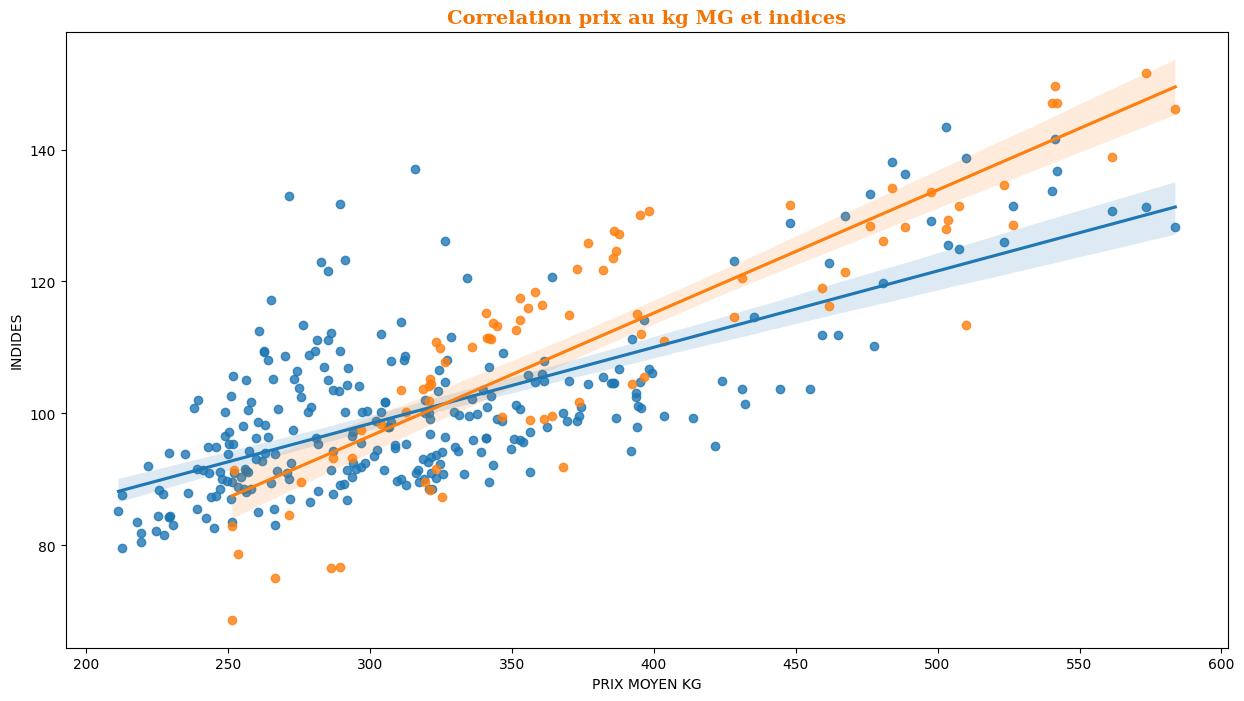

In [24]:
## GRAPHIQUE - Rendement vs Puissance
TITLE = "Correlation prix au kg MG et indices" # Titre de la figure
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8)) # Nombre et disposition des zones de dessin


axes.set_title(TITLE, fontdict={'family': 'serif','color' : '#F27405','weight': 'bold','size': 14})
axes = sns.regplot(x=df_net_r2.MOYENNE_MG_XPF, y=df_net_r2.INDICE_ISEE)
axes = sns.regplot(x=df_net_r2.MOYENNE_MG_XPF, y=df_net_r2.INDICE_MG)
axes.set(xlabel='PRIX MOYEN KG', ylabel='INDIDES')

# axes[1] = sns.regplot(x=df_net_r2.QUOTAS_REALISE_T, y=df_net_r2.INDICE_ISEE)
# axes[1].set(xlabel='PRIX MOYEN KG', ylabel='INDIDES')